In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
%matplotlib inline

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Wartości kategoryczne: Survived, Sex, Embarked

Porządkowe: Pclass


Numeryczne: Age, Fare, SibSp, Parch

Ticket oraz Cabin mają oznaczenie numeryczne i literowe

In [14]:
test_df.info()
print('_'*50)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1  

Cabin oraz Age są niekompletne (NaN)

In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Przeżyło 38%. Większość pasażerów nie podróżowała z rodzicami lub dziećmi. Połowa pasażerów podróżowała z rodzeństwem lub małżonkiem.

In [16]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Kategorie Cabin oraz Ticket mają powtarzające się wartości. Część pasażerów mogła dzielić kabinę. Większość wypłynęła z portu S.

# Wnioski wstępne

Kategorie Cabin i Ticket nie powinny mieć znaczenia dla przeżywalności zwłaszcza, że dużo wyników się powtarza lub nie posiada wartości.
Imię oraz ID to wartości, których celem jest jedynie oznaczanie poszczególnych pasażerów i jako takie nie mają znaczenia.
Kategoriami, które w największym stopniu decydują o przeżywalności będą: płeć, wiek, klasa. Znaczenie może mieć również port.
    
W dalszej części możemy utworzyć osobną kolumnę opisującą wielkość rodziny bazując na wartościach SibSp i Parch.    


In [36]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [37]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [43]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [44]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Klasa i płeć mają bardzo dużą zależność z przeżywalnością:
- kobiety mają znacznie większą szansę na przeżycie niż mężczyźni
- im wyższa klasa tym większa szansa na przeżycie. 

Rodzina najprawdopodobniej nie ma większego znaczenia.

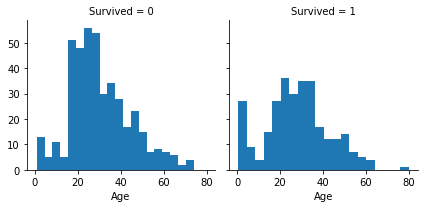

In [80]:

g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

Niemowlęta miały dużą szanśe na przeżycie. Najmniejszą szansę miała grupa młodych ludzi w wieku 12-25 lat.

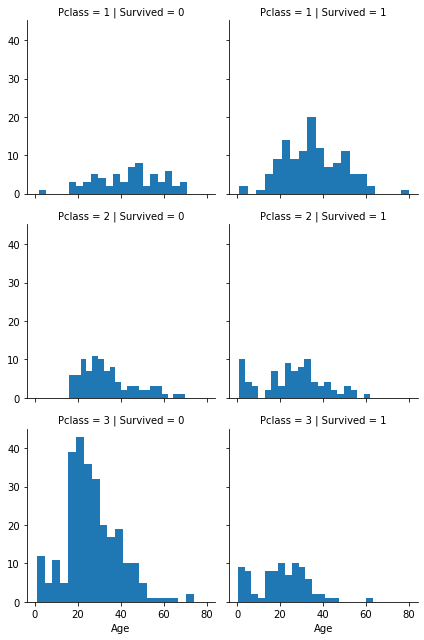

In [79]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass')
g.map(plt.hist, 'Age', bins=20);

Wpływ klasy na przeżywalność.

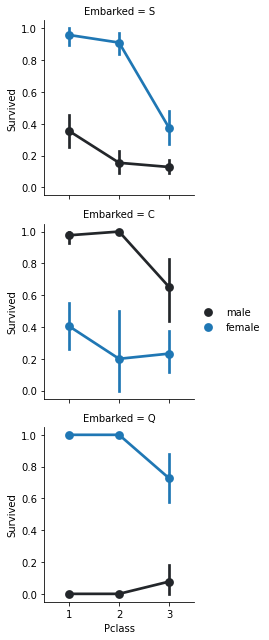

In [78]:
import warnings
warnings.filterwarnings('ignore')
g = sns.FacetGrid(train_df,row='Embarked')
g.map(sns.pointplot, 'Pclass','Survived','Sex', pallete='deep')
g.add_legend();


Wplyw płci na przeżywalność.

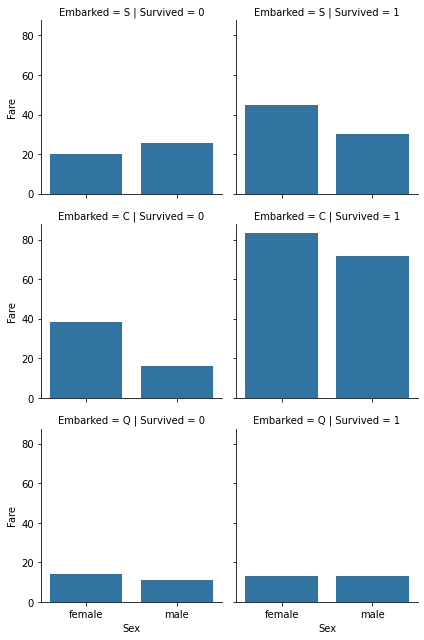

In [77]:
warnings.filterwarnings('ignore')

g = sns.FacetGrid(train_df, col='Survived', row='Embarked')
g.map(sns.barplot, 'Sex', 'Fare', ci=None);

Port ma znaczenie w wyznaczaniu przeżywalności. Ci, którzy więcej zapłacili mieli większe szanse na przeżycie.

Zgodnie z wcześniejszymi ustaleniami usuwamy Ticket oraz Cabin.

In [95]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

Kolumna Name zawiera tytuły poszczególnych pasażerów. Można je oddzielić i sprawdzić czy tytuł pasażera ma wpływ na przeżywalność

In [97]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [106]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


Tytuły zostały uproszczone. Te, które były trudne do kwalifikacji zostały zapisane w kategorii Rare. 
Wyniki potwierdzają wcześniejsze wnioski. Wyższa przeżywalność w kategorii tytułu Master wynika z tego, że Master to tytuł mężczyzny, który nie jest pełnoletni. W przypadku załogi Titanica tytuł Master odnosi się przede wszystkim do niemowląt stąd stosunkowo duża przeżywalność. 

Skoro wyodrębniliśmy tytuły możemy odrzucić kolumny Name oraz PassengerId.

In [109]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

Należy uzupełnić kolumnę Age. Zmienimy także kolumnę Sex na wartość liczbową.

In [119]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


In [120]:
guess_ages= np.zeros((2,3))

In [136]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head(10)  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,0,3,0,22,1,0,7.2500,S,Mr,"(16.0, 32.0]",2,0
1,1,1,1,38,1,0,71.2833,C,Mrs,"(32.0, 48.0]",2,0
2,1,3,1,26,0,0,7.9250,S,Miss,"(16.0, 32.0]",1,1
3,1,1,1,35,1,0,53.1000,S,Mrs,"(32.0, 48.0]",2,0
4,0,3,0,35,0,0,8.0500,S,Mr,"(32.0, 48.0]",1,1
5,0,3,0,25,0,0,8.4583,Q,Mr,"(16.0, 32.0]",1,1
6,0,1,0,54,0,0,51.8625,S,Mr,"(48.0, 64.0]",1,1
7,0,3,0,2,3,1,21.0750,S,Master,"(-0.08, 16.0]",5,0
8,1,3,1,27,0,2,11.1333,S,Mrs,"(16.0, 32.0]",3,0
9,1,2,1,14,1,0,30.0708,C,Mrs,"(-0.08, 16.0]",2,0


Kolumna Age została uzupełniona. Można podzielić pasażerów na grupy wiekowe.

In [126]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Teraz można stworzyć kolumnę z ilością osób w rodzinie.

In [127]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()    

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


Ilość osoób w rodzinie wydaje się nie mieć korelacji z przeżywalnością. Sprawdźmy czy istnieje zależność pomiędzy przeżywalnością u osoób, które mają rodzinę, a tych którzy są sami.

In [132]:
dataset['IsAlone'] = 0
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
        
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,0,3,0,22,1,0,7.2500,S,Mr,"(16.0, 32.0]",2,0
1,1,1,1,38,1,0,71.2833,C,Mrs,"(32.0, 48.0]",2,0
2,1,3,1,26,0,0,7.9250,S,Miss,"(16.0, 32.0]",1,1
3,1,1,1,35,1,0,53.1000,S,Mrs,"(32.0, 48.0]",2,0
4,0,3,0,35,0,0,8.0500,S,Mr,"(32.0, 48.0]",1,1


In [133]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Pasażerowie, którzy byli z rodziną mieli większe szanse na przeżycie od tych, którzy byli sami.
Możemy odrzucić kolumny SibSp, Parch i FamilySize

In [142]:
train_df = train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
test_df = test_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,22,7.2500,S,Mr,"(16.0, 32.0]",0
1,1,1,1,38,71.2833,C,Mrs,"(32.0, 48.0]",0
2,1,3,1,26,7.9250,S,Miss,"(16.0, 32.0]",1
3,1,1,1,35,53.1000,S,Mrs,"(32.0, 48.0]",0
4,0,3,0,35,8.0500,S,Mr,"(32.0, 48.0]",1


Sprawdzimy przeżywalność w zależności od opłaty.

In [144]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(), inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,IsAlone
0,0,3,0,22,7.2500,S,Mr,"(16.0, 32.0]",0
1,1,1,1,38,71.2833,C,Mrs,"(32.0, 48.0]",0
2,1,3,1,26,7.9250,S,Miss,"(16.0, 32.0]",1
3,1,1,1,35,53.1000,S,Mrs,"(32.0, 48.0]",0
4,0,3,0,35,8.0500,S,Mr,"(32.0, 48.0]",1


In [147]:
train_df['FareBand'] = pd.cut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


Osoby, które miały wyższą cenę biletu miały większą szansę na przeżycie.

# Wnioski

Wstępne wnioski okazały się poprawne. Kobiety oraz małe dzieci (niemowlęta) miały znacznie większą szansę na przeżycie niż mężczyźni, zwłaszcza w przedziale 15-25 lat.
Bardzo duże znaczenie miała klasa w jakiej podróżowali pasażerowie- im wyższa tym większa przeżywalność.
Koszt biletu oraz rodzina miały mniejsze znaczenie, chociaż można zauważyć, że osoby z najtańszymi biletami miały najmniejsze szanse na przeżycie. Podobnie jak osoby podróżujące samotnie.

